In [1]:
import cv2
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Import Images

In [2]:
img_1 = cv2.cvtColor(cv2.imread('images/1.jpg'), cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(cv2.imread('images/2.jpg'), cv2.COLOR_BGR2RGB)

In [3]:
def show_cv2(img):
    plt.imshow(img)

In [4]:
img_1.shape

(4032, 3024, 3)

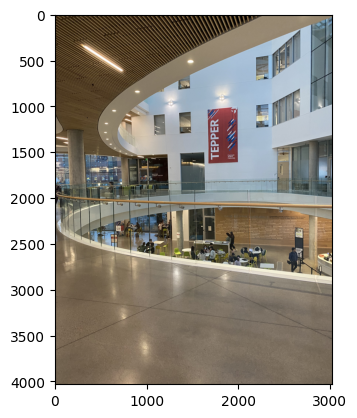

In [5]:
show_cv2(img_1)

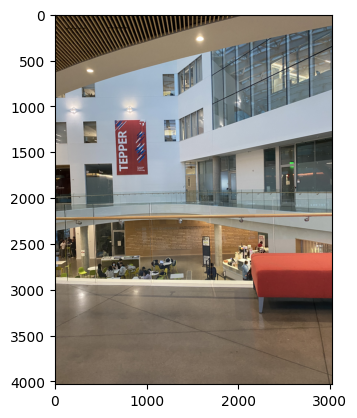

In [6]:
show_cv2(img_2)

In [7]:
def crop(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    (x, y, w, h) = cv2.boundingRect(cnt)

    return image[y:y + h, x:x + w]

# Key Point Selection

In [8]:
# SIFT feature extraction
def findKeyPoints(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    (kps, features) = sift.detectAndCompute(image, None)

    return (kps, features)

# Feature Description

# Feature Matching

In [9]:
# Bruteforce matching
def matchKeyPoints(feature1, feature2, ratio = 0.75):
    match = cv2.BFMatcher()
    matches = match.knnMatch(feature1, feature2, k=2)

    good = []
    for m,n in matches:
        if m.distance < ratio * n.distance:
            good.append(m)

    return good

def matchKeyPoints(feature1, feature2):
    for feature in feature1:

SyntaxError: incomplete input (1861685648.py, line 14)

# Homography Calculations

In [10]:
def getHomography(kp1, kp2, matches):
    if len(matches) <= 4:
        return None

    kpA = np.float32([kp.pt for kp in kp1])
    kpB = np.float32([kp.pt for kp in kp2])

    ptsA = np.float32([kpA[m.queryIdx] for m in matches])
    ptsB = np.float32([kpB[m.trainIdx] for m in matches])
    (H, status) = cv2.findHomography(ptsB, ptsA, cv2.RANSAC, 4.0)

    return (H, status)

# Main

In [11]:
start = time.time()
(kp1, feature1) = findKeyPoints(img_1)
(kp2, feature2) = findKeyPoints(img_2)
end = time.time()
print(end-start)
print(kp1)
print(feature1)
start = time.time()
matches = matchKeyPoints(feature1, feature2)
end = time.time()
print(end-start)

start = time.time()
homography = getHomography(kp1, kp2, matches)
end = time.time()
print(end-start)

start = time.time()
width = img_1.shape[1] + img_2.shape[1]
height = img_1.shape[0] + img_2.shape[0]

result = np.zeros([height,width,3], dtype=np.uint8)
result[0:img_1.shape[0], 0:img_1.shape[1]] = img_1
warp = cv2.warpPerspective(img_2, homography[0], (width, height))
mask = warp != 0
result[mask] = 0
result += warp
end = time.time()
print(end-start)

6.556539058685303
(< cv2.KeyPoint 000002236546F960>, < cv2.KeyPoint 00000223655B2AF0>, < cv2.KeyPoint 0000022354AF7840>, < cv2.KeyPoint 0000022369D64C60>, < cv2.KeyPoint 0000022369D64930>, < cv2.KeyPoint 0000022369D58E70>, < cv2.KeyPoint 0000022369D5B5D0>, < cv2.KeyPoint 0000022369D58AB0>, < cv2.KeyPoint 0000022369D5B420>, < cv2.KeyPoint 0000022369D59740>, < cv2.KeyPoint 0000022369D5A8B0>, < cv2.KeyPoint 0000022369D59770>, < cv2.KeyPoint 0000022369D5B270>, < cv2.KeyPoint 0000022369D5B840>, < cv2.KeyPoint 0000022369CF1AA0>, < cv2.KeyPoint 0000022369D38B10>, < cv2.KeyPoint 0000022369D38BD0>, < cv2.KeyPoint 0000022369D38B40>, < cv2.KeyPoint 0000022369D3AE50>, < cv2.KeyPoint 0000022369D38CC0>, < cv2.KeyPoint 0000022369D39860>, < cv2.KeyPoint 0000022369D3A250>, < cv2.KeyPoint 0000022369D388A0>, < cv2.KeyPoint 0000022369D8BED0>, < cv2.KeyPoint 0000022369D8A310>, < cv2.KeyPoint 0000022369D8BDE0>, < cv2.KeyPoint 0000022369D8A3D0>, < cv2.KeyPoint 0000022369D2F870>, < cv2.KeyPoint 0000022369D2E4

NameError: name 'matchKeyPoints' is not defined

In [ ]:
print(len(kp1), len(feature1))

36966 36966


In [ ]:
print(result.shape)

(8064, 6048, 3)


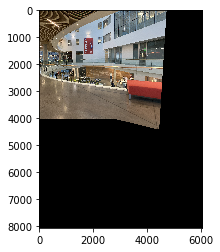

In [ ]:
show_cv2(result)

In [ ]:
c = crop(result)

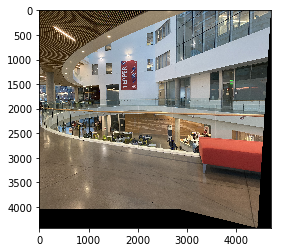

In [ ]:
show_cv2(c)